# Pandas

## Carregando arquivo csv

In [1]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
import pandas as pd
import seaborn as sns
%matplotlib inline
births = pd.read_csv('data/births.csv', index_col=0)

## Analise inicial

Vamos começar com 4 comandos simples, que servem para uma análise inicial do dataset.

* Head - Ver os x primeiras entradas do dataset.
* Info - Verificar tipos de dados
* Describe - Descrever os dados numéricos
* Plot - Mostrar graficamente o dataset.

In [2]:
births.head()

,month,day,gender,births
year,,,,
1969,1,1,F,4046
1969,1,1,M,4440
1969,1,2,F,4454
1969,1,2,M,4548
1969,1,3,F,4548


In [3]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15547 entries, 1969 to 2008
Data columns (total 4 columns):
month     15547 non-null int64
day       15547 non-null object
gender    15547 non-null object
births    15547 non-null int64
dtypes: int64(2), object(2)
memory usage: 607.3+ KB


In [4]:
births.describe()

,month,births
count,15547.000000,15547.000000
mean,6.515919,9762.293561
std,3.449632,28552.465810
min,1.000000,1.000000
25%,4.000000,4358.000000
50%,7.000000,4814.000000
75%,10.000000,5289.500000
max,12.000000,199622.000000


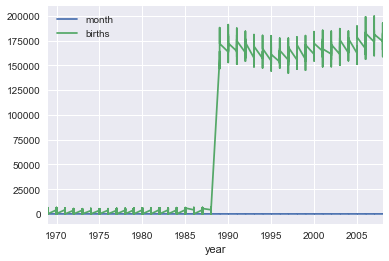

In [5]:
births.plot()

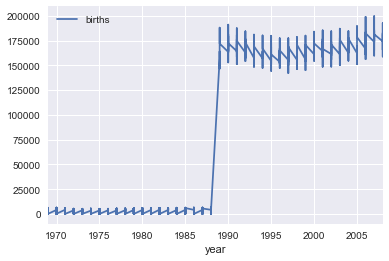

In [6]:
births.plot(y="births")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61e03c0c50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f61e0384278>], dtype=object)

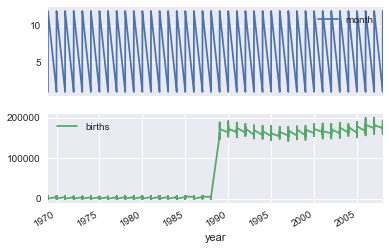

In [7]:
births.plot(subplots=True)

Logo de inicio podemos ver que o dataset tem algumas coisas que não parecem muito corretas. O atributo *day* está como object e temos uma grande descontinuidade entre 1985 e 1990

Para corrigir isso vamos ver alguns comandos de seleção e analise quantitativa

# Analise quantitativa

Podemos dar uma segunda olhada nos dados através de algumas funções quantitativas

In [8]:
births.mean()

month        6.515919
births    9762.293561
dtype: float64

In [9]:
births.sum()

month                                                101303
day       1122334455667788991010111112121313141415151616...
gender    FMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFM...
births                                            151774378
dtype: object

In [10]:
births.corr()

,month,births
month,1.000000,0.005101
births,0.005101,1.000000


## Seleção

### Selecionar colunas

In [11]:
days = births["day"]
days.head(5)


year
1969    1
1969    1
1969    2
1969    2
1969    3
Name: day, dtype: object

### Contar valores em uma coluna

In [12]:
days.value_counts()

23      480
20      480
10      480
13      480
3       480
2       480
18      480
26      480
17      480
27      480
25      480
11      480
16      480
4       480
5       480
21      480
28      480
1       480
15      480
6       480
7       480
19      480
null    480
12      480
24      480
14      480
8       480
9       480
22      480
29      464
30      450
31      363
99      350
Name: day, dtype: int64

### Selecionar pelo indice

In [13]:
births.loc[1988].tail(5)

,month,day,gender,births
year,,,,
1988,12,29,M,5944
1988,12,30,F,5742
1988,12,30,M,6095
1988,12,31,F,4435
1988,12,31,M,4698


In [14]:
births.loc[1989].head(5)

,month,day,gender,births
year,,,,
1989,1,null,F,156749
1989,1,null,M,164052
1989,2,null,F,146710
1989,2,null,M,154047
1989,3,null,F,165889


### Selecionar por posição geral

In [15]:
births.loc[1989].query("month==1 and gender=='F'")["births"].values/births.loc[1988].query("month==12 and gender=='F'")["births"]

year
1988    28.541333
1988    29.828544
1988    36.001148
1988    38.598621
1988    30.005551
1988    28.101291
1988    28.766563
1988    28.931155
1988    29.839901
1988    35.984619
1988    38.770467
1988    29.092242
1988    28.417150
1988    28.448094
1988    28.329839
1988    27.881359
1988    36.709368
1988    37.223700
1988    27.738276
1988    25.730302
1988    28.698096
1988    30.034298
1988    32.074688
1988    38.953529
1988    40.461797
1988    36.675012
1988    27.826913
1988    26.758109
1988    27.213368
1988    27.298676
1988    35.343630
Name: births, dtype: float64

In [16]:
births.iloc[1989]

month        8
day          5
gender       M
births    4956
Name: 1971, dtype: object

### Seleção multi coluna

In [17]:
births[["month","gender","births"]].head(5)

,month,gender,births
year,,,
1969,1,F,4046
1969,1,M,4440
1969,1,F,4454
1969,1,M,4548
1969,1,F,4548


### Execução de querys

In [18]:
births.query("day=='null' or day == '99'")

,month,day,gender,births
year,,,,
1969,1,99,F,26
1969,1,99,M,38
1969,2,99,F,42
1969,2,99,M,48
1969,3,99,F,64
1969,3,99,M,50
1969,4,99,F,50
1969,4,99,M,66
1969,5,99,F,54


In [19]:
births.query("month==1 and gender=='F'").head(5)

,month,day,gender,births
year,,,,
1969,1,1,F,4046
1969,1,2,F,4454
1969,1,3,F,4548
1969,1,4,F,4440
1969,1,5,F,4192


Baseado nas seleções podemos ver que temos alguns meses que possuíram dados com dias inválidos (99) e que após 1988 os dados são todos mensais em vez de diários. Vamos então arrumar a coluna days para que null sejam tratados como NaN e para que a coluna seja numérica

# Transformação de dados, object -> numeric


In [20]:
births["day"] = pd.to_numeric(births["day"], errors="coersce", downcast="unsigned")
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15547 entries, 1969 to 2008
Data columns (total 4 columns):
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 927.3+ KB


Vamos remover os valores de dia constando 99 que são provavelmente erros de digitação

In [21]:
births = births.query("day < 99")

In [22]:
births.tail()

,month,day,gender,births
year,,,,
1988,12,29.0,M,5944
1988,12,30.0,F,5742
1988,12,30.0,M,6095
1988,12,31.0,F,4435
1988,12,31.0,M,4698


# Agrupamento e agregação

Vamos agora separar o dataset em 3 partes:

* Analíse por dia/genero
* Analíse por mês/genero
* Analíse por ano/genero

Para isso vamos utilizar os conceitos de agrupamento e agregação, além de remoção de nulos e seleção de colunas.

In [23]:
births_day = births.dropna()[["day","month","gender","births"]]
births_day["day"] = births_day["day"].astype(int)
births_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14717 entries, 1969 to 1988
Data columns (total 4 columns):
day       14717 non-null int64
month     14717 non-null int64
gender    14717 non-null object
births    14717 non-null int64
dtypes: int64(3), object(1)
memory usage: 574.9+ KB


In [24]:
births_month_year = births[["month","gender","births"]].groupby(["year","month","gender"]).aggregate("sum")
births_month_year.head(5)

births
year month gender        
1969 1     F       143704
           M       150172
     2     F       132316
           M       138380
     3     F       144020

### Desempilhando do indice

Uma função muito util quando temos indíces empilhados como acima é a unstack. Ela pega a camada mais externa do indice e transforma em camada mais externa da coluna

In [25]:
births_month_year = births_month_year.unstack()
births_month_year.head(5)

births        
gender           F       M
year month                
1969 1      143704  150172
     2      132316  138380
     3      144020  152416
     4      137210  145312
     5      140864  148154

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61e0133ba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f61e011eef0>], dtype=object)

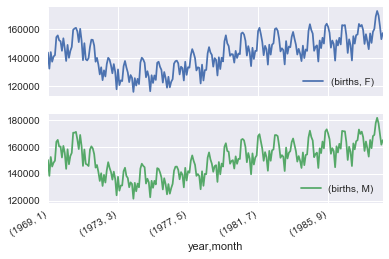

In [26]:
births_month_year.plot(subplots=True)

In [27]:
births_day_gender = births_day.groupby(["day","gender"])["births"].aggregate("mean").unstack()
births_day_gender.describe()

gender,F,M
count,31.000000,31.000000
mean,4658.604214,4902.943717
std,198.283078,212.197614
min,3614.745856,3779.434066
25%,4663.597917,4904.666667
50%,4702.233333,4943.829167
75%,4725.972917,4978.641667
max,4751.679167,4989.854167


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61dffe3438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f61dff48518>], dtype=object)

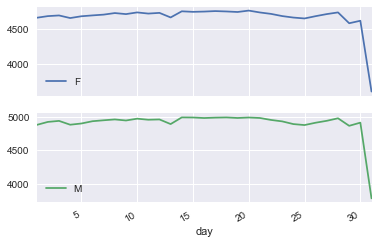

In [28]:
births_day_gender.plot(subplots=True)

Ainda podemos ver que existe algo de estranho, tem uma grande queda na média para o dia 31, o que é estranho. Para verificar isso vamos criar um campo date, utilizando o ano, dia e mes

### Criação de campo a partir de outros campos

In [29]:
births_day["str_years"] = births_day.index.astype(str) 
births_day["str_date"] = births_day["str_years"] + \
                              births_day["month"].astype(str) + \
                              births_day["day"].astype(str) 
births_day.head(5)

,day,month,gender,births,str_years,str_date
year,,,,,,
1969,1,1,F,4046,1969,196911
1969,1,1,M,4440,1969,196911
1969,2,1,F,4454,1969,196912
1969,2,1,M,4548,1969,196912
1969,3,1,F,4548,1969,196913


### Conversão de object para datetime

In [30]:
births_day["date"] = pd.to_datetime(births_day["str_date"], format='%Y%m%d', errors="coerce")
births_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14717 entries, 1969 to 1988
Data columns (total 7 columns):
day          14717 non-null int64
month        14717 non-null int64
gender       14717 non-null object
births       14717 non-null int64
str_years    14717 non-null object
str_date     14717 non-null object
date         14610 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 919.8+ KB


Podemos ver que tinhamos 107 elementos incorretos para uma data, vamos então ignorar estes e refazer os calculos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61dfbce1d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f61dfd014a8>], dtype=object)

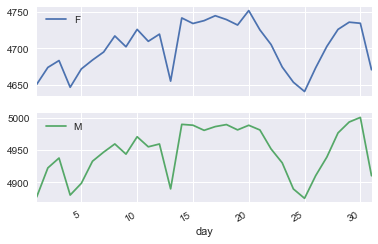

In [31]:
births_day.dropna(inplace=True)
births_day_gender = births_day.groupby(["day","gender"])["births"].aggregate("mean").unstack()
births_day_gender.plot(subplots=True)

Temos uma queda muito menos brusca agora. Podemos aproveitar que temos um campo datetime para fazer uma organização por dia da semana.

In [32]:
births_day["dow"] = births_day.apply(lambda x: x["date"].dayofweek,axis=1)

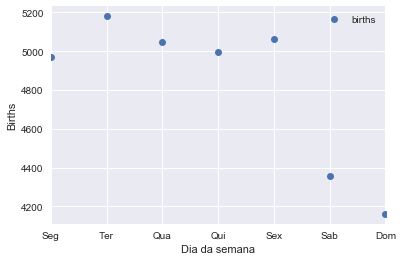

In [33]:
births_dow = births_day.groupby("dow")["births"].aggregate("mean")
ax = births_dow.plot(linestyle="",marker="o")
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
ax.set_ylabel("Births")
ax.set_xlabel("Dia da semana")
ax.legend()

# Bibliografia adicional
[Python DataScience HandBook](https://github.com/jakevdp/PythonDataScienceHandbook)
